In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
train = pd.read_csv('mimic_synthetic_train.csv')   # Read train data
test = pd.read_csv('die_test.csv')                 # Read test data
train = train.drop([0],axis=0)                     # Remove noise added row

/home/loser/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (291,336) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [57]:
Gender_mapping={'M':0,'F':1}                       # convert string to numeric
train['GENDER']=train['GENDER'].map(Gender_mapping)
test['GENDER']=test['GENDER'].map(Gender_mapping)

In [58]:
ICU_mapping={'CCU':1, 'MICU':2, 'TSICU':3, 'CSRU':4, 'SICU':5}   # convert string to numeric
train['ICU']=train['ICU'].map(ICU_mapping)
test['ICU']=test['ICU'].map(ICU_mapping)

In [59]:
train=train.iloc[:,9:]                                           # Remove non-repeated string data
test=test.iloc[:,9:]

In [60]:
train['Otnutritdx']=train['Otnutritdx'].astype(float)            # Make string to float type
test['Otnutritdx']=test['Otnutritdx'].astype(float)

In [61]:
train['Othnervdx']=train['Othnervdx'].astype(float)              # Make string to float type
test['Othnervdx']=test['Othnervdx'].astype(float)

In [62]:
for i in train:                                                  # Fill the missing value by mean  
    mean_value=train[i].mean()
    train[i]=train[i].fillna(mean_value)
for i in test:
    mean_value=test[i].mean()
    test[i]=test[i].fillna(mean_value)    

In [63]:
X = train.iloc[:,:-1]                                           #Train data without output class

In [64]:
Y = train.iloc[:,-1:]                                           # Output class

In [65]:
from imblearn.over_sampling import SMOTE                        # Balance imbalance data
sm = SMOTE(random_state=2)
X, Y = sm.fit_sample(X, np.ravel(Y))
print(sum(Y==0))
print(sum(Y==1))

77201
77201


In [66]:
from sklearn.preprocessing import StandardScaler                #Make standard scale
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
test = sc_X.transform(test)

In [67]:
from sklearn.model_selection import train_test_split            #Split data into train & test data 
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size = 0.20, random_state = 42)

In [ ]:
#Logistic Regression
from sklearn.metrics import accuracy_score  
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()                                    #Logistic Regression
logreg.fit(x_train, y_train)
x = pd.Series(y_test, name="Test Data")
ax = sns.distplot(x)

sns.distplot(y_test)
y_pred = logreg.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)      # Find Accuracy
print(acc_logreg)

/home/loser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


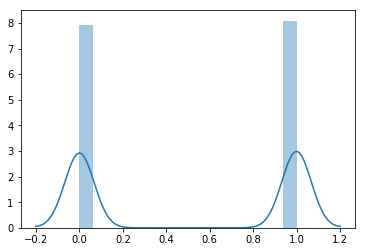

In [69]:
sns.distplot(y_pred)

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


svc = SVC(kernel='rbf',gamma=0.01,C=1,probability=True)
svc.fit(x_train, y_train)

sns.distplot(y_test)
y_pred = svc.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)


In [ ]:
sns.distplot(y_pred)

In [54]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
sns.distplot(y_test)
y_pred = gaussian.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

50.59


In [ ]:
sns.distplot(y_pred)

In [ ]:
#Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
sns.distplot(y_test)
y_pred = linear_svc.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

In [ ]:
sns.distplot(y_pred)

In [ ]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

In [ ]:
sns.distplot(y_pred)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
sns.distplot(y_test)
y_pred = decisiontree.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

In [ ]:
sns.distplot(y_pred)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest =  RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
randomforest.fit(x_train, y_train)
sns.distplot(y_test)
y_pred = randomforest.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

In [ ]:
sns.distplot(y_pred)

In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
sns.distplot(y_test)
y_pred = gbk.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)



In [ ]:
sns.distplot(y_pred)

In [ ]:
#Light GBM

import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l2', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(20, 150, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid,n_jobs=-1)
grid.fit(x_train, y_train)
print (grid.best_params_)
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 148, num_leaves = 38)
estimator.fit(x_train,y_train)
sns.distplot(y_test)
y_pred = estimator.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)



In [ ]:
sns.distplot(y_pred)

In [ ]:
# Deep Neural Network
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(output_dim=350,init='uniform',activation='relu',input_dim=332))
classifier.add(Dense(output_dim=350,init='uniform',activation='relu'))
classifier.add(Dense(output_dim=350,init='uniform',activation='relu'))
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(X,Y,batch_size=500,nb_epoch=100)
sns.distplot(y_test)
y_pred = classifier.predict(x_test)
l=[]
for i in range(len(y_pred)) :
    if(y_pred[i]>0.5):
        l.append(1)
    else:
        l.append(0)
j=0
count=0
for i in l :
    if l[j]==y_test[j]:
        count = count+1
    j=j+1
print(j)
print(count)
acc_logreg = round(accuracy_score(l, y_test) * 100, 2)
print(acc_logreg)


In [ ]:
sns.distplot(y_pred)